In [431]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [432]:
startup_df = pd.read_csv('https://thingspeak.com/channels/1874887/feed.csv')

In [433]:
startup_df.head(100)

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7
0,2023-02-21 05:05:23 UTC,312,-0.15,17.31,36.1,18.5,65.30,0.0,NaN
1,2023-02-21 05:05:38 UTC,313,-0.15,17.31,37.0,18.5,65.30,0.0,NaN
2,2023-02-21 05:05:58 UTC,314,-0.15,17.29,36.3,18.5,65.30,0.0,NaN
3,2023-02-21 05:06:13 UTC,315,-0.15,17.71,35.4,18.5,65.30,0.0,NaN
4,2023-02-21 05:06:31 UTC,316,-0.15,17.31,35.3,18.5,65.30,0.0,NaN
...,...,...,...,...,...,...,...,...,...
95,2023-02-21 05:34:25 UTC,407,-0.15,23.09,34.5,19.4,66.92,0.0,NaN
96,2023-02-21 05:34:44 UTC,408,-0.15,23.09,33.9,19.4,66.92,0.0,NaN
97,2023-02-21 05:34:59 UTC,409,-0.15,23.09,35.0,19.4,66.92,0.0,NaN
98,2023-02-21 05:35:19 UTC,410,-0.15,22.20,36.5,19.5,67.10,0.0,NaN


In [434]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  100 non-null    object 
 1   entry_id    100 non-null    int64  
 2   field1      100 non-null    float64
 3   field2      100 non-null    float64
 4   field3      100 non-null    float64
 5   field4      100 non-null    float64
 6   field5      100 non-null    float64
 7   field6      100 non-null    float64
 8   field7      0 non-null      float64
dtypes: float64(7), int64(1), object(1)
memory usage: 7.2+ KB


In [435]:
startup_df.isnull().sum()

created_at      0
entry_id        0
field1          0
field2          0
field3          0
field4          0
field5          0
field6          0
field7        100
dtype: int64

In [436]:
#Statistical Details of the dataset
startup_df.describe()


,entry_id,field1,field2,field3,field4,field5,field6,field7
count,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.0,0.0
mean,361.500000,-0.15,21.653300,35.282000,19.177000,66.518600,0.0,NaN
std,29.011492,0.00,2.951804,2.421636,0.462941,0.833293,0.0,NaN
min,312.000000,-0.15,16.850000,30.900000,18.500000,65.300000,0.0,NaN
25%,336.750000,-0.15,17.710000,33.875000,18.700000,65.660000,0.0,NaN
50%,361.500000,-0.15,23.090000,34.850000,19.400000,66.920000,0.0,NaN
75%,386.250000,-0.15,23.685000,36.725000,19.500000,67.100000,0.0,NaN
max,411.000000,-0.15,26.350000,43.800000,19.900000,67.820000,0.0,NaN


In [437]:
count=0
for i in startup_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(startup_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  100
since it is only 100 percent of the entire dataset the rows with missing values are excluded.


In [438]:
x=startup_df.iloc[:,2:8]
y=startup_df.iloc[:,2]


In [439]:
x

,field1,field2,field3,field4,field5,field6
0,-0.15,17.31,36.1,18.5,65.30,0.0
1,-0.15,17.31,37.0,18.5,65.30,0.0
2,-0.15,17.29,36.3,18.5,65.30,0.0
3,-0.15,17.71,35.4,18.5,65.30,0.0
4,-0.15,17.31,35.3,18.5,65.30,0.0
...,...,...,...,...,...,...
95,-0.15,23.09,34.5,19.4,66.92,0.0
96,-0.15,23.09,33.9,19.4,66.92,0.0
97,-0.15,23.09,35.0,19.4,66.92,0.0
98,-0.15,22.20,36.5,19.5,67.10,0.0


In [440]:
y

0    -0.15
1    -0.15
2    -0.15
3    -0.15
4    -0.15
      ... 
95   -0.15
96   -0.15
97   -0.15
98   -0.15
99   -0.15
Name: field1, Length: 100, dtype: float64

In [441]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [442]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)


X_train: (80, 6)
X_test: (20, 6)
Y_train: (80,)
Y_test: (20,)


In [443]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [444]:
y_pred=linreg.predict(x_test)
y_pred

array([-0.15, -0.15, -0.15, -0.15, -0.15, -0.15, -0.15, -0.15, -0.15,
       -0.15, -0.15, -0.15, -0.15, -0.15, -0.15, -0.15, -0.15, -0.15,
       -0.15, -0.15])

In [445]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)


 Accuracy of the model is 55.00


In [446]:
from notifypy import Notify
if(Accuracy <70):
    notification = Notify()
    notification.title = "Landslide alert"
    notification.message = "Safe area no chances of landslide"
    notification.send()
elif(Accuracy>70 and Accuracy <86):
    notification = Notify()
    notification.title = "Landslide alert"
    notification.message = "Moderate chances of landslide be alert"
    notification.send()
elif(Accuracy >86 and Accuracy <91):
    notification = Notify()
    notification.title = "Landslide alert"
    notification.message = "Yellow zone high chances of landslide"
    notification.send()
elif(Accuracy>92 and Accuracy<100):
    notification = Notify()
    notification.title = "Landslide alert"
    notification.message = "Danger Zone lookout in area as there are chances of prediction"
    notification.send()
elif(Accuracy == 100):
    notification = Notify()
    notification.title = "Landslide alert"
    notification.message = "!!!!!!!!!!!!Landslide!!!!!!!!!!!!!!!! evacuate"
    notification.send()



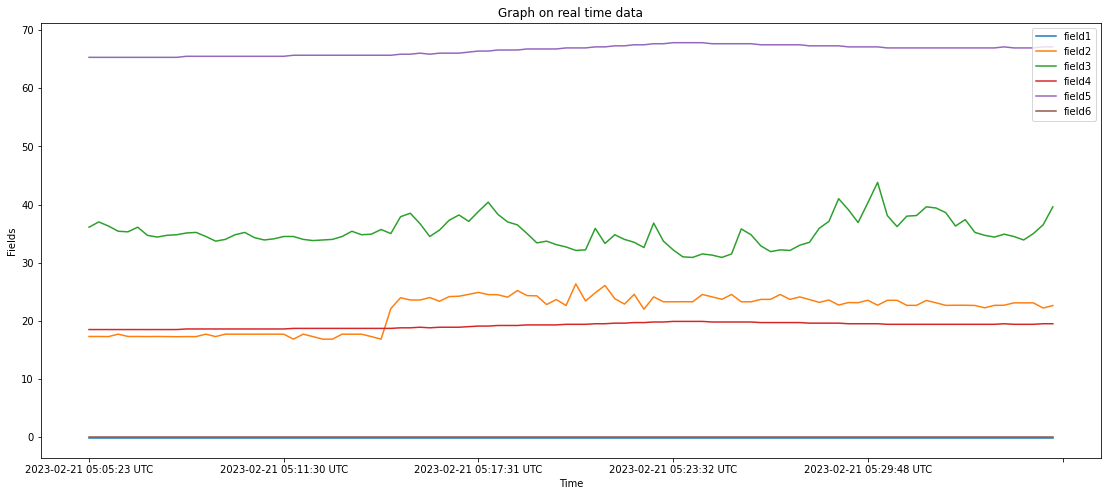

In [447]:


# plot the dataframe
startup_df.plot(x="created_at", y=["field1", "field2","field3","field4","field5","field6"], kind="line", figsize=(19, 8))
plt.title('Graph on real time data')
plt.xlabel('Time')
plt.ylabel('Fields')
# print bar graph
plt.show()